<a href="https://colab.research.google.com/github/etson32/Modelado-y-Simulacion/blob/main/LAB3_Poker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Modelado y Simulacion**
###**Implementacion de la validacion de numeros pseudo aleatorios con Poker**
---
```
Lugar        : Universidad Nacional de San Antonio Abad del Cusco
E.P          : Ingenieria Informatica y de Sistemas
Autor(es)    : Rojas Cahuana Etson Ronaldao
Fecha        : 10/04/2021
```
---
**Practica Individual/Grupal**:  
```
1. Implementar el test de Poker
    INPUT: Un vector de numeros pseudoaleatorios generados por un algoritmo.
    OUTPUT: True/False
           Opcional: Mostrar el valor de Chi Cuadrado.
```

##**Solucion:** 

### **1. Test Poker**

**1.1 Implementacion**



In [ ]:
from collections import Counter
import math

#MODULO PARA CONVERTIR NUMEROS PSEUDOALEATORIOS POR 1 AL 10
def ConvertirNrosEnteros(NrosPA):
  NrosReemplazados =[]
  for i in range (len(NrosPA)):
    NrosReemplazados.append(str(math.ceil(int(round(NrosPA[i],2)*10))+1))
  return NrosReemplazados

#GENERANDO SUBLISTAS DE 5 EN 5
def GenerarSublista(Lista):
  SubListasNrosR=[]
  SubListasNrosR = [Lista[i:i+5] for i in range(0, len(Lista), 5)] 
  return SubListasNrosR

#GENERANDO LA MANO DE POKER
def GenerarManoPoker(SubListaNrosR):
  ManosDePoker=[]
  for t in range(len(SubListasNrosR)):
    temp=sorted(list(Counter(SubListasNrosR[t]).items()))
    Contar=[]
    ManoPoker=''
    for k in range(len(temp)):
      Contar.append(temp[k][1])
    Contar=sorted(Contar,reverse=True)
    for i in range(len(temp)):
      ManoPoker=ManoPoker+'ABCDE'[i]*Contar[i]
    ManosDePoker.append(ManoPoker)
  return ManosDePoker

#CONTAR CLASES Y REAGRUPAR
def ContarClases(Poker):
  Contar=[]
  Contar.append(['AAAAA',Poker.count('AAAAA')])
  Contar.append(['AAAAB',Poker.count('AAAAB')])
  Contar.append(['AAABB',Poker.count('AAABB')])
  Contar.append(['AAABC',Poker.count('AAABC')])
  Contar.append(['AABBC',Poker.count('AABBC')])
  Contar.append(['AABCD',Poker.count('AABCD')])
  Contar.append(['ABCDE',Poker.count('ABCDE')])
  print(Contar)
  ClaseReagrupada=[]
  ClasesFuera=[]
  for i in range(len(Contar)):
    if Contar[i][1]>0:
      ClaseReagrupada.append(Contar[i])
  for j in range(len(ClaseReagrupada)):
    if ClaseReagrupada[j][1]<5 and j+1<len(ClaseReagrupada):
      ClaseReagrupada[j+1][1]=ClaseReagrupada[j+1][1]+ClaseReagrupada[j][1]
  Contar=[]
  for i in range(len(ClaseReagrupada)):
    if ClaseReagrupada[i][1]>4:
      Contar.append(ClaseReagrupada[i])    
  return Contar

#APLICANDO CHI CUADRADO
def ChiCuadradoClases(Clases):
  TablaX2_10porCiento = [[0,0.0000],[1,2.7055],[2,4.6052],[3,6.2514],[4,7.7794],[5,9.2363],[6,10.6446],[7,12.0170]]
  ProbabilidadClase = [['AAAAA',0.0001],
                       ['AAAAB',0.0045],
                       ['AAABB',0.0090],
                       ['AAABC',0.0720],
                       ['AABBC',0.1080],
                       ['AABCD',0.5040],
                       ['ABCDE',0.3024]]
  FO_Total=0
  FO=0
  FE=0
  X2=[]
  for i in range(len(Clases)):
    FO_Total = FO_Total + Clases[i][1]
  for k in range(len(Clases)):
    FO = Clases[k][1]
    for i in range(len(ProbabilidadClase)):
      if ProbabilidadClase[i][0]==Clases[k][0]:
        FE=round(FO_Total*ProbabilidadClase[i][1],3)
    X2.append(round(((FO-FE)**2)/FE,4))
  #El valor critico segun la tabla Chi cuadrado con K-1 y con un grado de confianza del 10% (0.1)
  k=len(Clases)
  ValorCritico = TablaX2_10porCiento[k-1][1]
  print('k:',k)
  print('X^2:',round(sum(X2),3))
  print('Valor Critico p =',k-1,'con un grado de confianza al 10% es:',ValorCritico)
  if round(sum(X2),3) < ValorCritico:
    print(True)
  else:
    print(False)

**a. Ejemplo con valores de la tabla de excel brindado**

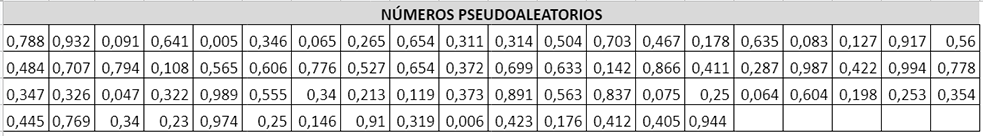

In [ ]:
#NÚMEROS PSEUDOALEATORIOS
NrosPA = [0.788, 0.932, 0.091, 0.641, 0.005, 0.346, 0.065, 0.265, 0.654,
          0.311, 0.314,	0.504, 0.703, 0.467, 0.178, 0.635, 0.083,	0.127,
          0.917, 0.56,  0.484, 0.707, 0.794, 0.108, 0.565, 0.606, 0.776,
          0.527, 0.654,	0.372, 0.699, 0.633, 0.142, 0.866, 0.411,	0.287,
          0.987, 0.422,	0.994, 0.778, 0.347, 0.326, 0.047, 0.322,	0.989,
          0.555, 0.34,  0.213, 0.119, 0.373, 0.891, 0.563, 0.837, 0.075,
           0.25, 0.064, 0.604, 0.198, 0.253, 0.354, 0.445, 0.769, 0.34,
           0.23, 0.974,	0.25,  0.146, 0.91,  0.319, 0.006, 0.423, 0.176,
          0.412, 0.405, 0.944]

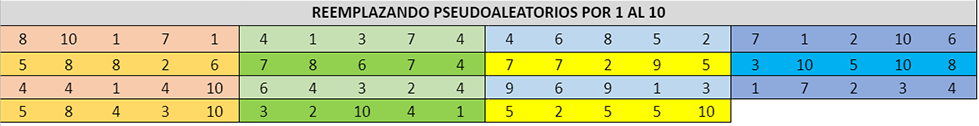

In [ ]:
NrosReemplazados=ConvertirNrosEnteros(NrosPA)
print(NrosReemplazados)

['8', '10', '1', '7', '1', '4', '1', '3', '7', '4', '4', '6', '8', '5', '2', '7', '1', '2', '10', '6', '5', '8', '8', '2', '6', '7', '8', '6', '7', '4', '8', '7', '2', '9', '5', '3', '10', '5', '10', '8', '4', '4', '1', '4', '10', '6', '4', '3', '2', '4', '9', '6', '9', '1', '3', '1', '7', '3', '3', '4', '5', '8', '4', '3', '10', '3', '2', '10', '4', '1', '5', '2', '5', '5', '10']


In [ ]:
#AGRUPANDO DE 5 EN 5 (CON DATOS MULTIPLOS DE 5)
ubListaNros = GenerarSublista(NrosReemplazados)
print(SubListaNros)

[['8', '10', '1', '7', '1'], ['4', '1', '3', '7', '4'], ['4', '6', '8', '5', '2'], ['7', '1', '2', '10', '6'], ['5', '8', '8', '2', '6'], ['7', '8', '6', '7', '4'], ['8', '7', '2', '9', '5'], ['3', '10', '5', '10', '8'], ['4', '4', '1', '4', '10'], ['6', '4', '3', '2', '4'], ['9', '6', '9', '1', '3'], ['1', '7', '3', '3', '4'], ['5', '8', '4', '3', '10'], ['3', '2', '10', '4', '1'], ['5', '2', '5', '5', '10']]


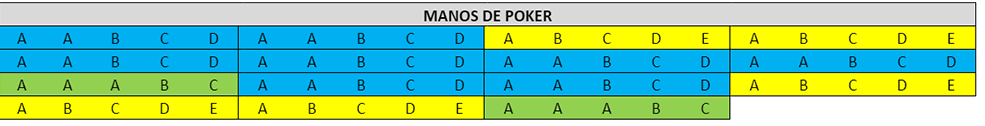

In [ ]:
#GENERANDO LAS MANOS DE POKER
ManosDePoker = GenerarManoPoker(SubListasNrosR)
print(ManosDePoker)

['AABCD', 'AABCD', 'ABCDE', 'ABCDE', 'AABCD', 'AABCD', 'ABCDE', 'AABCD', 'AAABC', 'AABCD', 'AABCD', 'AABCD', 'ABCDE', 'ABCDE', 'AAABC']


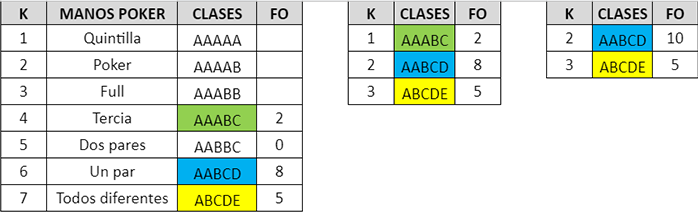

In [ ]:
#CONTANDO EL NUMERO ELEMENTOS POR CADA CLASE Y REAGRUPANDO
Clases=ContarClases(ManosDePoker)
print('Reagrupando Clases:',Clases)

[['AAAAA', 0], ['AAAAB', 0], ['AAABB', 0], ['AAABC', 2], ['AABBC', 0], ['AABCD', 8], ['ABCDE', 5]]
Reagrupando Clases: [['AABCD', 10], ['ABCDE', 5]]


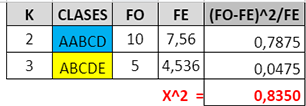

In [ ]:
#VALIDACION POR MEDIO DE CHI CUADRADO
ChiCuadradoClases(Clases)

k: 2
X^2: 0.835
Valor Critico p = 1 con un grado de confianza al 10% es: 2.7055
True
